In [54]:
#Прогноз цен на недвижимость в МСК
#
#

In [55]:
!pip install missingno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Чтение данных из файла
file_path = '/Users/marina/Downloads/_data.csv'
data = pd.read_csv('_data.csv')

# Вывод первых нескольких строк данных
data.head(10)





,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет, Телефон","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., Срок аренды - Длительный, Предоплата 1 мес",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет, Телефон",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., Срок аренды - Длительный, Предоплата 1 мес",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет, Телефон",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Посудомоечная машина, Телевизор, Холодильник, Интернет",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
5,5,274837728,3,Квартира,м. Смоленская (5 мин пешком),"Москва, 1-й Смоленский переулок, 21",92.0,3/7,NaN,"470000.0 руб./ За месяц, Залог - 470000 руб., Срок аренды - Длительный, Предоплата 2 мес",...,NaN,NaN,NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник",Smolensky De Luxe,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/274837728
6,6,273643908,"5, Оба варианта",Квартира,м. Арбатская (4 мин пешком),"Москва, переулок Романов, 3С1",213.0/140.0/20.0,4/5,наземная,"350000.0 руб./ За месяц, Залог - 350000 руб., Срок аренды - Длительный, Предоплата 1 мес",...,На улицу и двор,Совмещенный (2),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Стиральная машина, Посудомоечная машина, Телевизор, Холодильник, Интернет, Телефон",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/273643908
7,7,274475342,3,Квартира,м. Смоленская (3 мин пешком),"Москва, улица Арбат, 43С3",98.0/63.0/9.0,"2/4, Монолитный",подземная,"250000.0 руб./ За месяц, Залог - 250000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес",

In [56]:
# Вывод колонок/признаков
columns = data.columns
print("Наименование признака:")
columns

Наименование признака:


Index(['Unnamed: 0', 'ID  объявления', 'Количество комнат', 'Тип', 'Метро',
       'Адрес', 'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны',
       'Описание', 'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод',
       'Ссылка на объявление'],
      dtype='object')

In [57]:
#Описание данных

#Признаки:
#'ID  объявления', 
#'Количество комнат', 
#'Тип', 
#'Метро',
#'Адрес', 
#'Площадь, м2', 
#'Дом', 
#'Парковка', 
#'Цена', 
#'Телефоны',
#'Описание', 
#'Ремонт', 
#'Площадь комнат, м2', 
#'Балкон', 
#'Окна', 
#'Санузел',
#'Можно с детьми/животными', 
#'Дополнительно', 
#'Название ЖК',
#'Серия дома', 
#'Высота потолков, м', 
#'Лифт', 
#'Мусоропровод',
#'Ссылка на объявление'

#Целевой признак - цена

In [58]:
# объём данных (строк и столбцов - объектов и признаков)
data.shape

(23368, 25)

In [59]:
# выводим типы данных
data.dtypes



Unnamed: 0                    int64
ID  объявления                int64
Количество комнат            object
Тип                          object
Метро                        object
Адрес                        object
Площадь, м2                  object
Дом                          object
Парковка                     object
Цена                         object
Телефоны                     object
Описание                     object
Ремонт                       object
Площадь комнат, м2           object
Балкон                       object
Окна                         object
Санузел                      object
Можно с детьми/животными     object
Дополнительно                object
Название ЖК                  object
Серия дома                   object
Высота потолков, м          float64
Лифт                         object
Мусоропровод                 object
Ссылка на объявление         object
dtype: object

In [60]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23368 non-null  int64  
 1   ID  объявления            23368 non-null  int64  
 2   Количество комнат         22327 non-null  object 
 3   Тип                       23368 non-null  object 
 4   Метро                     22053 non-null  object 
 5   Адрес                     23368 non-null  object 
 6   Площадь, м2               23368 non-null  object 
 7   Дом                       23368 non-null  object 
 8   Парковка                  9951 non-null   object 
 9   Цена                      23368 non-null  object 
 10  Телефоны                  23368 non-null  object 
 11  Описание                  23368 non-null  object 
 12  Ремонт                    20613 non-null  object 
 13  Площадь комнат, м2        14458 non-null  object 
 14  Балкон

In [61]:
# Подсчет пропусков по колонкам
for col in data.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, data[col].isna().sum()))

Кол-во пропусков в колонке Unnamed: 0 = 0
Кол-во пропусков в колонке ID  объявления = 0
Кол-во пропусков в колонке Количество комнат = 1041
Кол-во пропусков в колонке Тип = 0
Кол-во пропусков в колонке Метро = 1315
Кол-во пропусков в колонке Адрес = 0
Кол-во пропусков в колонке Площадь, м2 = 0
Кол-во пропусков в колонке Дом = 0
Кол-во пропусков в колонке Парковка = 13417
Кол-во пропусков в колонке Цена = 0
Кол-во пропусков в колонке Телефоны = 0
Кол-во пропусков в колонке Описание = 0
Кол-во пропусков в колонке Ремонт = 2755
Кол-во пропусков в колонке Площадь комнат, м2 = 8910
Кол-во пропусков в колонке Балкон = 7978
Кол-во пропусков в колонке Окна = 6613
Кол-во пропусков в колонке Санузел = 2672
Кол-во пропусков в колонке Можно с детьми/животными = 6096
Кол-во пропусков в колонке Дополнительно = 357
Кол-во пропусков в колонке Название ЖК = 17520
Кол-во пропусков в колонке Серия дома = 21205
Кол-во пропусков в колонке Высота потолков, м = 12162
Кол-во пропусков в колонке Лифт = 5500
Ко

In [62]:
# проверка на отсутствующие значения для всех колонок датафрейма
data.isnull().sum()

Unnamed: 0                      0
ID  объявления                  0
Количество комнат            1041
Тип                             0
Метро                        1315
Адрес                           0
Площадь, м2                     0
Дом                             0
Парковка                    13417
Цена                            0
Телефоны                        0
Описание                        0
Ремонт                       2755
Площадь комнат, м2           8910
Балкон                       7978
Окна                         6613
Санузел                      2672
Можно с детьми/животными     6096
Дополнительно                 357
Название ЖК                 17520
Серия дома                  21205
Высота потолков, м          12162
Лифт                         5500
Мусоропровод                10522
Ссылка на объявление            0
dtype: int64

In [63]:
# Подсчет уникальных значений по колонкам с выводом наименований колонок
for column in data.columns:
    unique_count = data[column].nunique()
    print(f"Колонка '{column}' имеет {unique_count} уникальных значений.")

Колонка 'Unnamed: 0' имеет 23368 уникальных значений.
Колонка 'ID  объявления' имеет 23368 уникальных значений.
Колонка 'Количество комнат' имеет 24 уникальных значений.
Колонка 'Тип' имеет 1 уникальных значений.
Колонка 'Метро' имеет 5866 уникальных значений.
Колонка 'Адрес' имеет 12850 уникальных значений.
Колонка 'Площадь, м2' имеет 11255 уникальных значений.
Колонка 'Дом' имеет 2565 уникальных значений.
Колонка 'Парковка' имеет 5 уникальных значений.
Колонка 'Цена' имеет 3922 уникальных значений.
Колонка 'Телефоны' имеет 13172 уникальных значений.
Колонка 'Описание' имеет 23078 уникальных значений.
Колонка 'Ремонт' имеет 4 уникальных значений.
Колонка 'Площадь комнат, м2' имеет 3990 уникальных значений.
Колонка 'Балкон' имеет 18 уникальных значений.
Колонка 'Окна' имеет 3 уникальных значений.
Колонка 'Санузел' имеет 20 уникальных значений.
Колонка 'Можно с детьми/животными' имеет 3 уникальных значений.
Колонка 'Дополнительно' имеет 528 уникальных значений.
Колонка 'Название ЖК' име

In [64]:
# Получaeм уникальные значений для каждой колонки
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Уникальные значения в колонке '{column}': {unique_values}")

Уникальные значения в колонке 'Unnamed: 0': [    0     1     2 ... 23365 23366 23367]
Уникальные значения в колонке 'ID  объявления': [271271157 271634126 271173086 ... 268679909 274807525 274672243]
Уникальные значения в колонке 'Количество комнат': ['4' '4, Оба варианта' '2' '3' '5, Оба варианта' '3, Изолированная' '5'
 '5, Изолированная' '2, Оба варианта' '3, Оба варианта' '6' '1'
 '4, Изолированная' '6, Оба варианта' '2, Изолированная' nan '2, Смежная'
 '4, Смежная' '3, Смежная' '6, Изолированная' '1, Изолированная'
 '1, Оба варианта' '5, Смежная' '6, Смежная' '1, Смежная']
Уникальные значения в колонке 'Тип': ['Квартира']
Уникальные значения в колонке 'Метро': ['м. Смоленская (9 мин пешком)' 'м. Смоленская (8 мин пешком)'
 'м. Смоленская (7 мин пешком)' ... 'м. Боровское шоссе (5 мин на машине)'
 'м. Говорово (2 мин пешком)' 'м. Солнцево (5 мин на машине)']
Уникальные значения в колонке 'Адрес': ['Москва, улица Новый Арбат, 27' 'Москва, переулок Плотников, 21С1'
 'Москва, улица Но

In [65]:
# Получаем статистику распределения значений для каждой колонки
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Статистика распределения значений в колонке '{column}':\n{value_counts}\n")

Статистика распределения значений в колонке 'Unnamed: 0':
Unnamed: 0
0        1
15586    1
15584    1
15583    1
15582    1
        ..
7787     1
7786     1
7785     1
7784     1
23367    1
Name: count, Length: 23368, dtype: int64

Статистика распределения значений в колонке 'ID  объявления':
ID  объявления
271271157    1
274501861    1
274414964    1
262801046    1
274141194    1
            ..
273075114    1
267367343    1
272612739    1
274832126    1
274672243    1
Name: count, Length: 23368, dtype: int64

Статистика распределения значений в колонке 'Количество комнат':
Количество комнат
1                   7917
2, Изолированная    4623
2                   2591
3                   1717
3, Изолированная    1583
3, Оба варианта      875
4                    674
2, Смежная           637
2, Оба варианта      615
4, Оба варианта      253
5                    235
4, Изолированная     223
6                     87
3, Смежная            87
5, Оба варианта       81
5, Изолированная      47
6

In [66]:
# описательная статистика для всех (числовых) признаков
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23368.0,1.168350e+04,6.745905e+03,0.0,5.841750e+03,1.168350e+04,1.752525e+04,23367.0
ID объявления,23368.0,2.676265e+08,1.876862e+07,107298592.0,2.712663e+08,2.739030e+08,2.746872e+08,275006443.0
"Высота потолков, м",11206.0,2.983450e+00,7.614720e+00,1.2,2.640000e+00,2.640000e+00,2.800000e+00,320.0


In [67]:
# Расчет моды
mode = data.mode().iloc[0]
print("\nМоды:")
mode


Моды:


Unnamed: 0                                                                                                                                     0
ID  объявления                                                                                                                         107298592
Количество комнат                                                                                                                              1
Тип                                                                                                                                     Квартира
Метро                                                                                                           м. Академическая (10 мин пешком)
Адрес                                                                                                             Москва, Чапаевский переулок, 3
Площадь, м2                                                                                                                       

In [68]:
columns = data.columns
print("Наименование признака:")
columns

Наименование признака:


Index(['Unnamed: 0', 'ID  объявления', 'Количество комнат', 'Тип', 'Метро',
       'Адрес', 'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны',
       'Описание', 'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод',
       'Ссылка на объявление'],
      dtype='object')

In [69]:
pd.set_option('display.max_colwidth', None)
prices_full_rows = data[['Цена']].head(10)
prices_full_rows

,Цена
0,"500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес"
1,"500000.0 руб./ За месяц, Залог - 500000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес"
2,"500000.0 руб./ За месяц, Залог - 500000 руб., Срок аренды - Длительный, Предоплата 1 мес"
3,"400000.0 руб./ За месяц, Залог - 400000 руб., Срок аренды - Длительный, Предоплата 1 мес"
4,"225000.0 руб./ За месяц, Залог - 225000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес"
5,"470000.0 руб./ За месяц, Залог - 470000 руб., Срок аренды - Длительный, Предоплата 2 мес"
6,"350000.0 руб./ За месяц, Залог - 350000 руб., Срок аренды - Длительный, Предоплата 1 мес"
7,"250000.0 руб./ За месяц, Залог - 250000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес"
8,"130000.0 руб./ За месяц, Залог - 130000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес"
9,"210000.0 руб./ За месяц, Залог - 210000 руб., Коммунальные услуги включены, Срок аренды - Длительный, Предоплата 1 мес"


In [70]:
#Раскладываем строку цена
for index, row in data.iterrows():
    parts = row['Цена'].split(', ')  # Разбиваем по запятой с пробелом
    for part in parts:
        if 'За месяц' in part:
            price = part.split(' ')[0]  # Извлекаем сумму за месяц
            # Преобразуем в числовое значение (float)
            data.at[index, 'price_monthly'] = float(''.join(filter(lambda x: x.isdigit() or x == '.', price)))
        elif 'Залог' in part:
            deposit = part.split(' ')[-2]  # Извлекаем сумму залога
            # Преобразуем в числовое значение (float)
            data.at[index, 'deposit'] = float(''.join(filter(lambda x: x.isdigit() or x == '.', deposit)))
        elif 'Предоплата' in part:
            prepayment = part.split(' ')[-2] if len(part.split(' ')) > 1 else None
            # Преобразуем в числовое значение (float)
            data.at[index, 'prepayment'] = float(''.join(filter(lambda x: x.isdigit(), str(prepayment))))
        elif 'Коммунальные услуги' in part:
            data.at[index, 'utility'] = 'включены'
# Вычисляем моду
mode_utility = data['utility'].mode()[0]
mode_deposit = data['deposit'].mode()[0]
mode_prepayment = data['prepayment'].mode()[0]

# Заполнение пропущенных значений в столбцах 'pledge' и 'deposit' модой
data['deposit'].fillna(mode_deposit, inplace=True)
data['prepayment'].fillna(mode_prepayment, inplace=True)
data['utility'].fillna(mode_utility, inplace=True)


# Показываем первые строки с новыми колонками
data[['price_monthly', 'deposit', 'prepayment', 'utility']].head()

,price_monthly,deposit,prepayment,utility
0,500000.0,500000.0,1.0,включены
1,500000.0,500000.0,1.0,включены
2,500000.0,500000.0,1.0,nan
3,400000.0,400000.0,1.0,nan
4,225000.0,225000.0,1.0,включены


<Axes: >

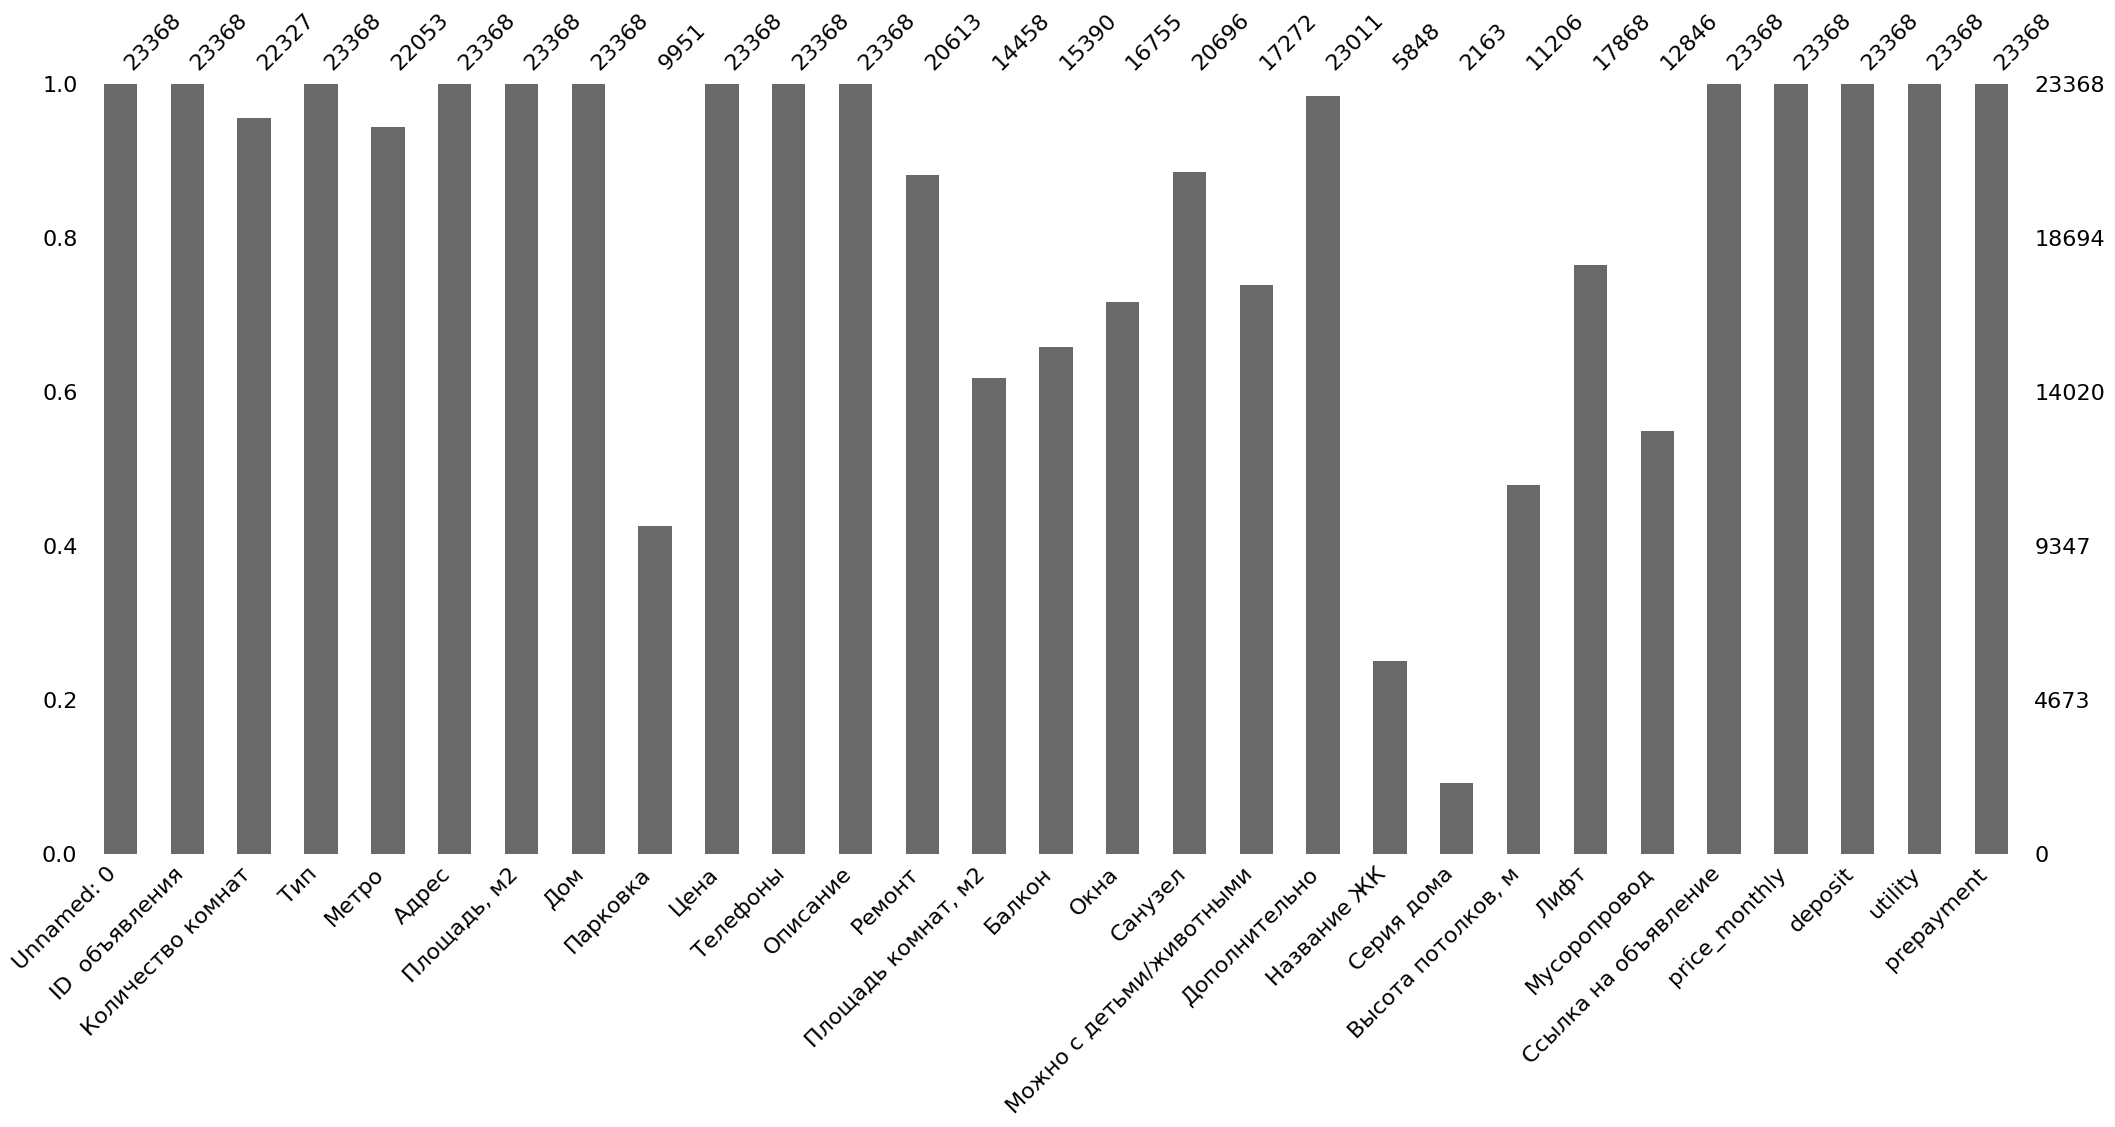

In [71]:
msno.bar(data)

In [72]:
data_clean = data.copy()

In [73]:
data_clean = data_clean.drop(columns = ['Название ЖК','Цена','Тип','Ссылка на объявление','Дополнительно', 'Unnamed: 0', 'Телефоны','ID  объявления','Описание'])

In [74]:
data_clean

,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,price_monthly,deposit,utility,prepayment
0,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными",NaN,3.00,"Пасс (4), Груз (1)",Да,500000.0,500000.0,включены,1.0
1,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,NaN,3.50,"Пасс (1), Груз (1)",Нет,500000.0,500000.0,включены,1.0
2,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,NaN,3.20,Пасс (1),NaN,500000.0,500000.0,nan,1.0
3,"4, Оба варианта",м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,NaN,3.20,Пасс (1),NaN,400000.0,400000.0,nan,1.0
4,2,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,NaN,3.90,"Пасс (1), Груз (1)",Да,225000.0,225000.0,включены,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,NaN,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 км до МКАД), ш. Сколковское (8 км до МКАД)",35.0/16.4/8.0,10/14,NaN,Евроремонт,NaN,Балкон (1),NaN,Совмещенный (1),NaN,NaN,NaN,"Пасс (1), Груз (1)",NaN,42000.0,42000.0,включены,1.0
23364,1,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровское (5 км до МКАД), ш. Киевское (7 км до МКАД)",38.7/16.5/11.0,"5/18, Монолитный",NaN,Евроремонт,NaN,Лоджия (1),Во двор,Совмещенный (1),NaN,NaN,NaN,"Пасс (1), Груз (1)",NaN,45000.0,45000.0,включены,1.0
23365,"2, Оба варианта",м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,Дизайнерский,NaN,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,NaN,NaN,NaN,NaN,50000.0,50000.0,включены,1.0
23366,2,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 км до МКАД), ш. Сколковское (8 км до МКАД)",52.5/10.0,"8/23, Монолитный",наземная,Евроремонт,NaN,Лоджия (1),Во двор,"Совмещенный (1), Раздельный (1)",NaN,NaN,2.65,Пасс (3),Да,55000.0,50000.0,включены,2.0


In [75]:
# Вывод колонок/признаков по новому data_clean
columns = data_clean.columns
columns


Index(['Количество комнат', 'Метро', 'Адрес', 'Площадь, м2', 'Дом', 'Парковка',
       'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Серия дома', 'Высота потолков, м', 'Лифт',
       'Мусоропровод', 'price_monthly', 'deposit', 'utility', 'prepayment'],
      dtype='object')

In [76]:
data_clean.columns = [
    'number_of_rooms',
    'metro',
    'address',
    'area',
    'building',
    'parking',
    'renovation',
    'room_area',
    'balcony',
    'windows',
    'bathroom',
    'children/pets allowed',
    'building_series',
    'ceiling_height',
    'elevator',
    'trash_chute',
    'price_monthly',
    'deposit',
    'utility',
    'prepayment'
]

In [77]:
data_clean['number_of_rooms']

0                      4
1                      4
2        4, Оба варианта
3        4, Оба варианта
4                      2
              ...       
23363                NaN
23364                  1
23365    2, Оба варианта
23366                  2
23367    2, Оба варианта
Name: number_of_rooms, Length: 23368, dtype: object

In [78]:
data_clean['number_of_rooms'] = data_clean['number_of_rooms'].str.extract(r'(\d+)') #очищу от букв столбец с кол-вом комнат

In [79]:
data_clean

,number_of_rooms,metro,address,area,building,parking,renovation,room_area,balcony,windows,bathroom,children/pets allowed,building_series,ceiling_height,elevator,trash_chute,price_monthly,deposit,utility,prepayment
0,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными",NaN,3.00,"Пасс (4), Груз (1)",Да,500000.0,500000.0,включены,1.0
1,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,NaN,3.50,"Пасс (1), Груз (1)",Нет,500000.0,500000.0,включены,1.0
2,4,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,NaN,3.20,Пасс (1),NaN,500000.0,500000.0,nan,1.0
3,4,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,NaN,3.20,Пасс (1),NaN,400000.0,400000.0,nan,1.0
4,2,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,NaN,3.90,"Пасс (1), Груз (1)",Да,225000.0,225000.0,включены,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,NaN,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 км до МКАД), ш. Сколковское (8 км до МКАД)",35.0/16.4/8.0,10/14,NaN,Евроремонт,NaN,Балкон (1),NaN,Совмещенный (1),NaN,NaN,NaN,"Пасс (1), Груз (1)",NaN,42000.0,42000.0,включены,1.0
23364,1,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровское (5 км до МКАД), ш. Киевское (7 км до МКАД)",38.7/16.5/11.0,"5/18, Монолитный",NaN,Евроремонт,NaN,Лоджия (1),Во двор,Совмещенный (1),NaN,NaN,NaN,"Пасс (1), Груз (1)",NaN,45000.0,45000.0,включены,1.0
23365,2,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,Дизайнерский,NaN,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,NaN,NaN,NaN,NaN,50000.0,50000.0,включены,1.0
23366,2,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 км до МКАД), ш. Сколковское (8 км до МКАД)",52.5/10.0,"8/23, Монолитный",наземная,Евроремонт,NaN,Лоджия (1),Во двор,"Совмещенный (1), Раздельный (1)",NaN,NaN,2.65,Пасс (3),Да,55000.0,50000.0,включены,2.0


In [80]:
unique_values = data_clean['trash_chute'].unique()
unique_values

array(['Да', 'Нет', nan], dtype=object)

In [81]:
data_clean['trash_chute'] = data_clean['trash_chute'].replace({'Да': 1, 'Нет': 0, pd.NA: 0})

In [82]:
correlation = data_clean['price_monthly'].corr(data_clean['trash_chute'])
correlation

-0.12654849076962307

In [83]:
#отрицательный и низкий показатель коэф. корреляции, поэтому этот столбец можно исключить из выборки для машинного обучения

In [84]:
data_clean = data_clean.drop(columns = 'trash_chute')

In [85]:
data_clean['metro'] = data_clean['metro'].str.extract(r'(\d+)')

In [86]:
data_clean['metro'] = data_clean['metro'].astype(float)

In [87]:
mean_metro = data_clean['metro'].mean()
data_clean['metro'].fillna(mean_metro, inplace=True)

In [88]:
data_clean.head(25)

,number_of_rooms,metro,address,area,building,parking,renovation,room_area,balcony,windows,bathroom,children/pets allowed,building_series,ceiling_height,elevator,price_monthly,deposit,utility,prepayment
0,4,9.0,"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными",NaN,3.0,"Пасс (4), Груз (1)",500000.0,500000.0,включены,1.0
1,4,8.0,"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,NaN,3.5,"Пасс (1), Груз (1)",500000.0,500000.0,включены,1.0
2,4,7.0,"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,NaN,3.2,Пасс (1),500000.0,500000.0,nan,1.0
3,4,3.0,"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,NaN,3.2,Пасс (1),400000.0,400000.0,nan,1.0
4,2,7.0,"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,NaN,3.9,"Пасс (1), Груз (1)",225000.0,225000.0,включены,1.0
5,3,5.0,"Москва, 1-й Смоленский переулок, 21",92.0,3/7,NaN,Дизайнерский,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470000.0,470000.0,nan,2.0
6,5,4.0,"Москва, переулок Романов, 3С1",213.0/140.0/20.0,4/5,наземная,Евроремонт,43-25-25-25-22,NaN,На улицу и двор,Совмещенный (2),"Можно с детьми, Можно с животными",NaN,3.2,Пасс (1),350000.0,350000.0,nan,1.0
7,3,3.0,"Москва, улица Арбат, 43С3",98.0/63.0/9.0,"2/4, Монолитный",подземная,Евроремонт,26 22 15,NaN,Во двор,"Совмещенный (1), Раздельный (1)","Можно с детьми, Можно с животными",NaN,3.2,Пасс (1),250000.0,250000.0,включены,1.0
8,3,9.0,"Москва, Новинский бульвар, 18С1",120.0/95.0/10.0,"5/10, Сталинский",открытая,Евроремонт,45 25 25,NaN,На улицу,Совмещенный (1),Можно с животными,NaN,3.0,Пасс (1),130000.0,130000.0,включены,1.0
9,4,10.0,"Москва, улица Арбат, 30/3С1",90.0/66.0/10.0,"2/7, Сталинский",открытая,Евроремонт,16 14 16 20,Балкон (1),На улицу и двор,"Совмещенный (1), Раздельный (1)",Можно с детьми,NaN,310.0,Пасс (1),210000.0,210000.0,включены,1.0


<Axes: >

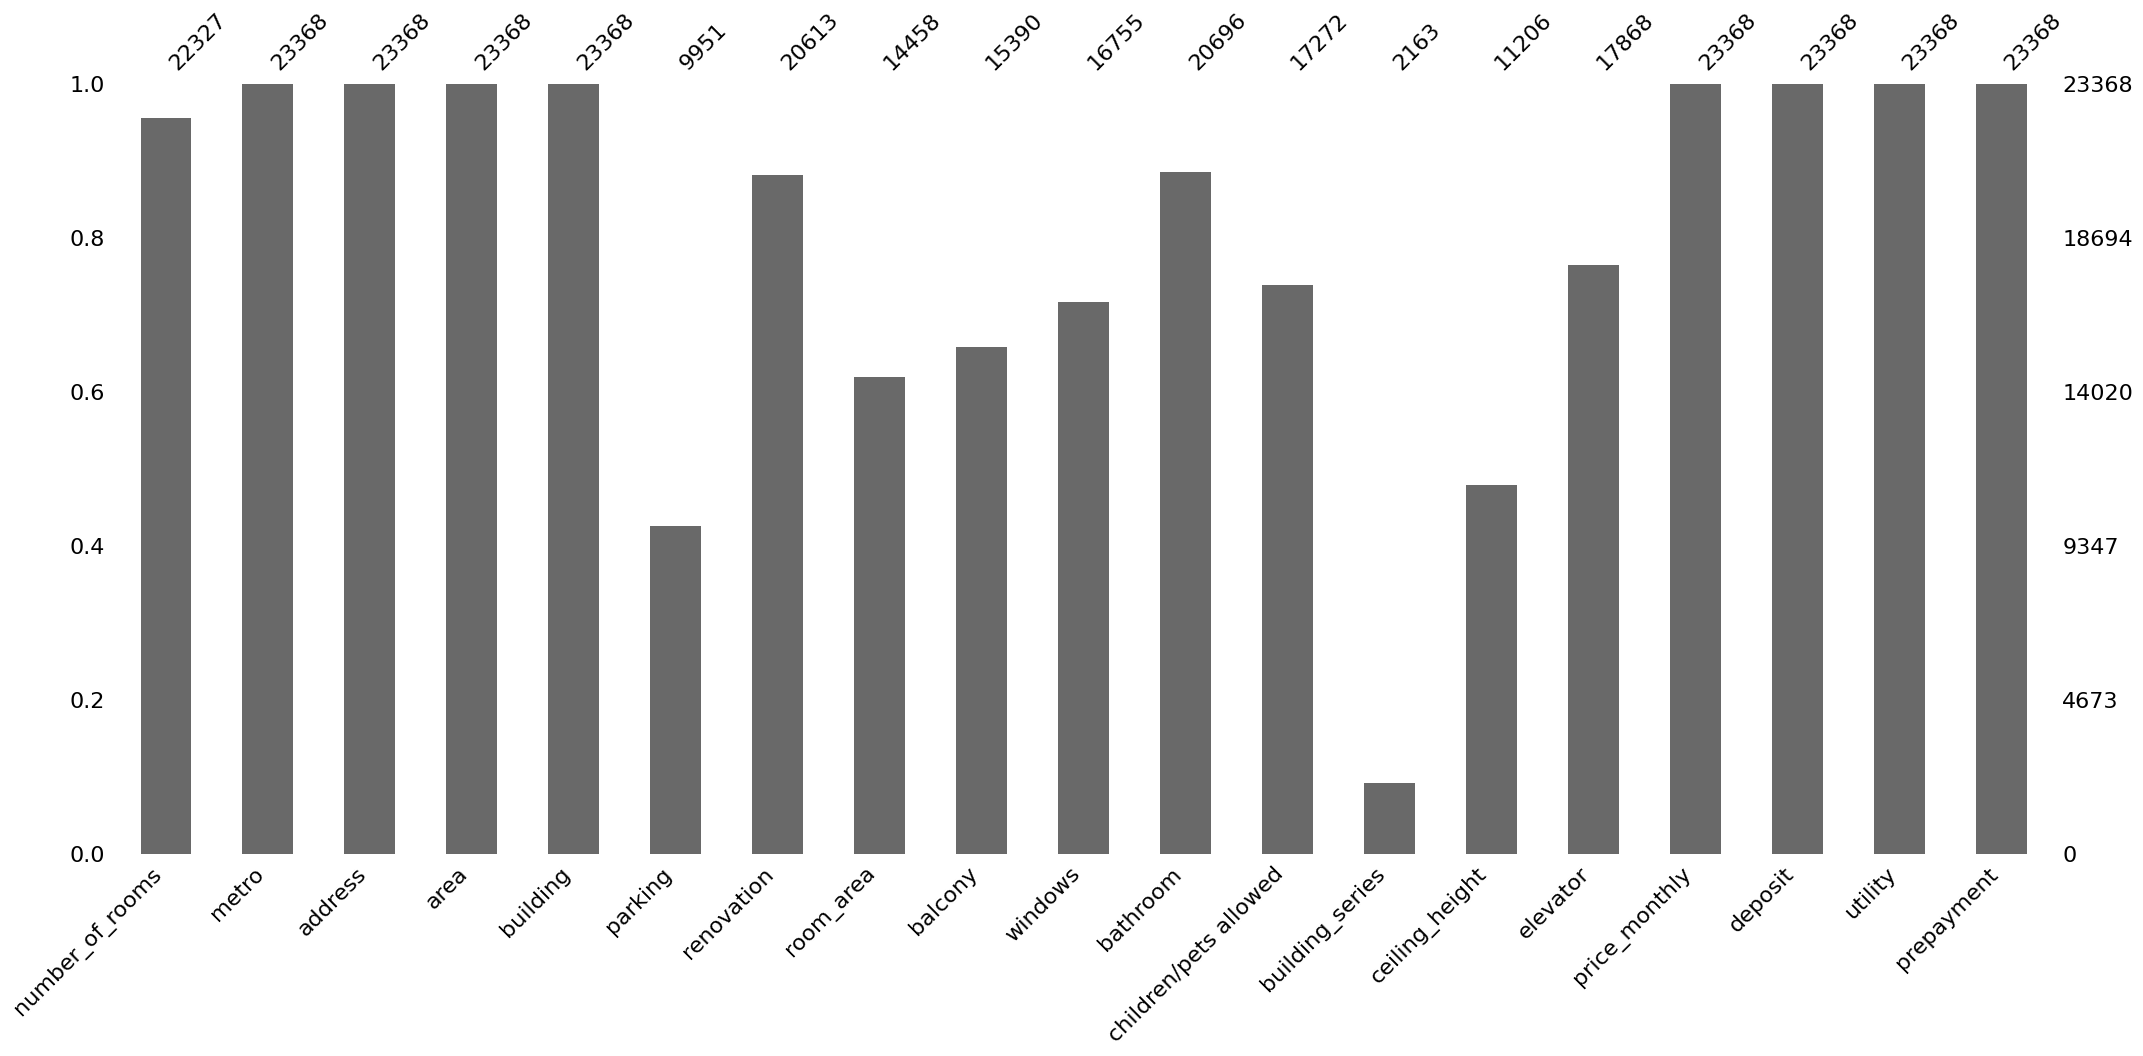

In [89]:
msno.bar(data_clean) #теперь в колонке метро нет нанов

In [90]:
data_clean['prepayment'] #колонка была заполнена модой

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
23363    1.0
23364    1.0
23365    1.0
23366    2.0
23367    1.0
Name: prepayment, Length: 23368, dtype: float64

In [91]:
unique_values1 = data_clean['prepayment'].unique()
print(unique_values1)

[ 1.  2.  3. 11.  6. 12.]


In [92]:
data_clean['prepayment'].fillna(0, inplace=True)

In [93]:
data_clean.loc[data_clean['prepayment'] == 0, 'deposit'].fillna(0, inplace=True)

In [94]:
columns = data_clean.columns
columns

Index(['number_of_rooms', 'metro', 'address', 'area', 'building', 'parking',
       'renovation', 'room_area', 'balcony', 'windows', 'bathroom',
       'children/pets allowed', 'building_series', 'ceiling_height',
       'elevator', 'price_monthly', 'deposit', 'utility', 'prepayment'],
      dtype='object')

In [95]:
data_clean = data_clean.drop(columns = 'building_series')

In [96]:
data_clean['area'] = data_clean['area'].apply(lambda x: x.split('/'))
data_clean['area'] = data_clean['area'].apply(lambda i: i[0])

In [97]:
data_clean['area'] = data_clean["area"].astype(float)

In [98]:
data_clean['number_of_rooms'] = data_clean['number_of_rooms'].fillna(data_clean['area']/40).astype(int)

In [99]:
data_clean = data_clean.drop(columns = 'room_area') 

In [100]:
data_clean = data_clean.drop(columns = 'prepayment') 

In [101]:
#случайные числа от 2.6 до 4.0 для заполнения NaN
random_values = np.random.uniform(2.6, 4.0, size=data_clean['ceiling_height'].isnull().sum())
#замена NaN случайными значениями от 2.6 до 4.0
data_clean.loc[data_clean['ceiling_height'].isnull(), 'ceiling_height'] = random_values

In [102]:
data_clean[['floors', 'type_house']] = data_clean['building'].str.split(', ', expand=True)
data_clean['floors'] = data_clean['floors'].str.replace(r'\D', '', regex=True) #удаление символов в столбце с этажами
data_clean = data_clean.drop(columns = 'building') 

<Axes: >

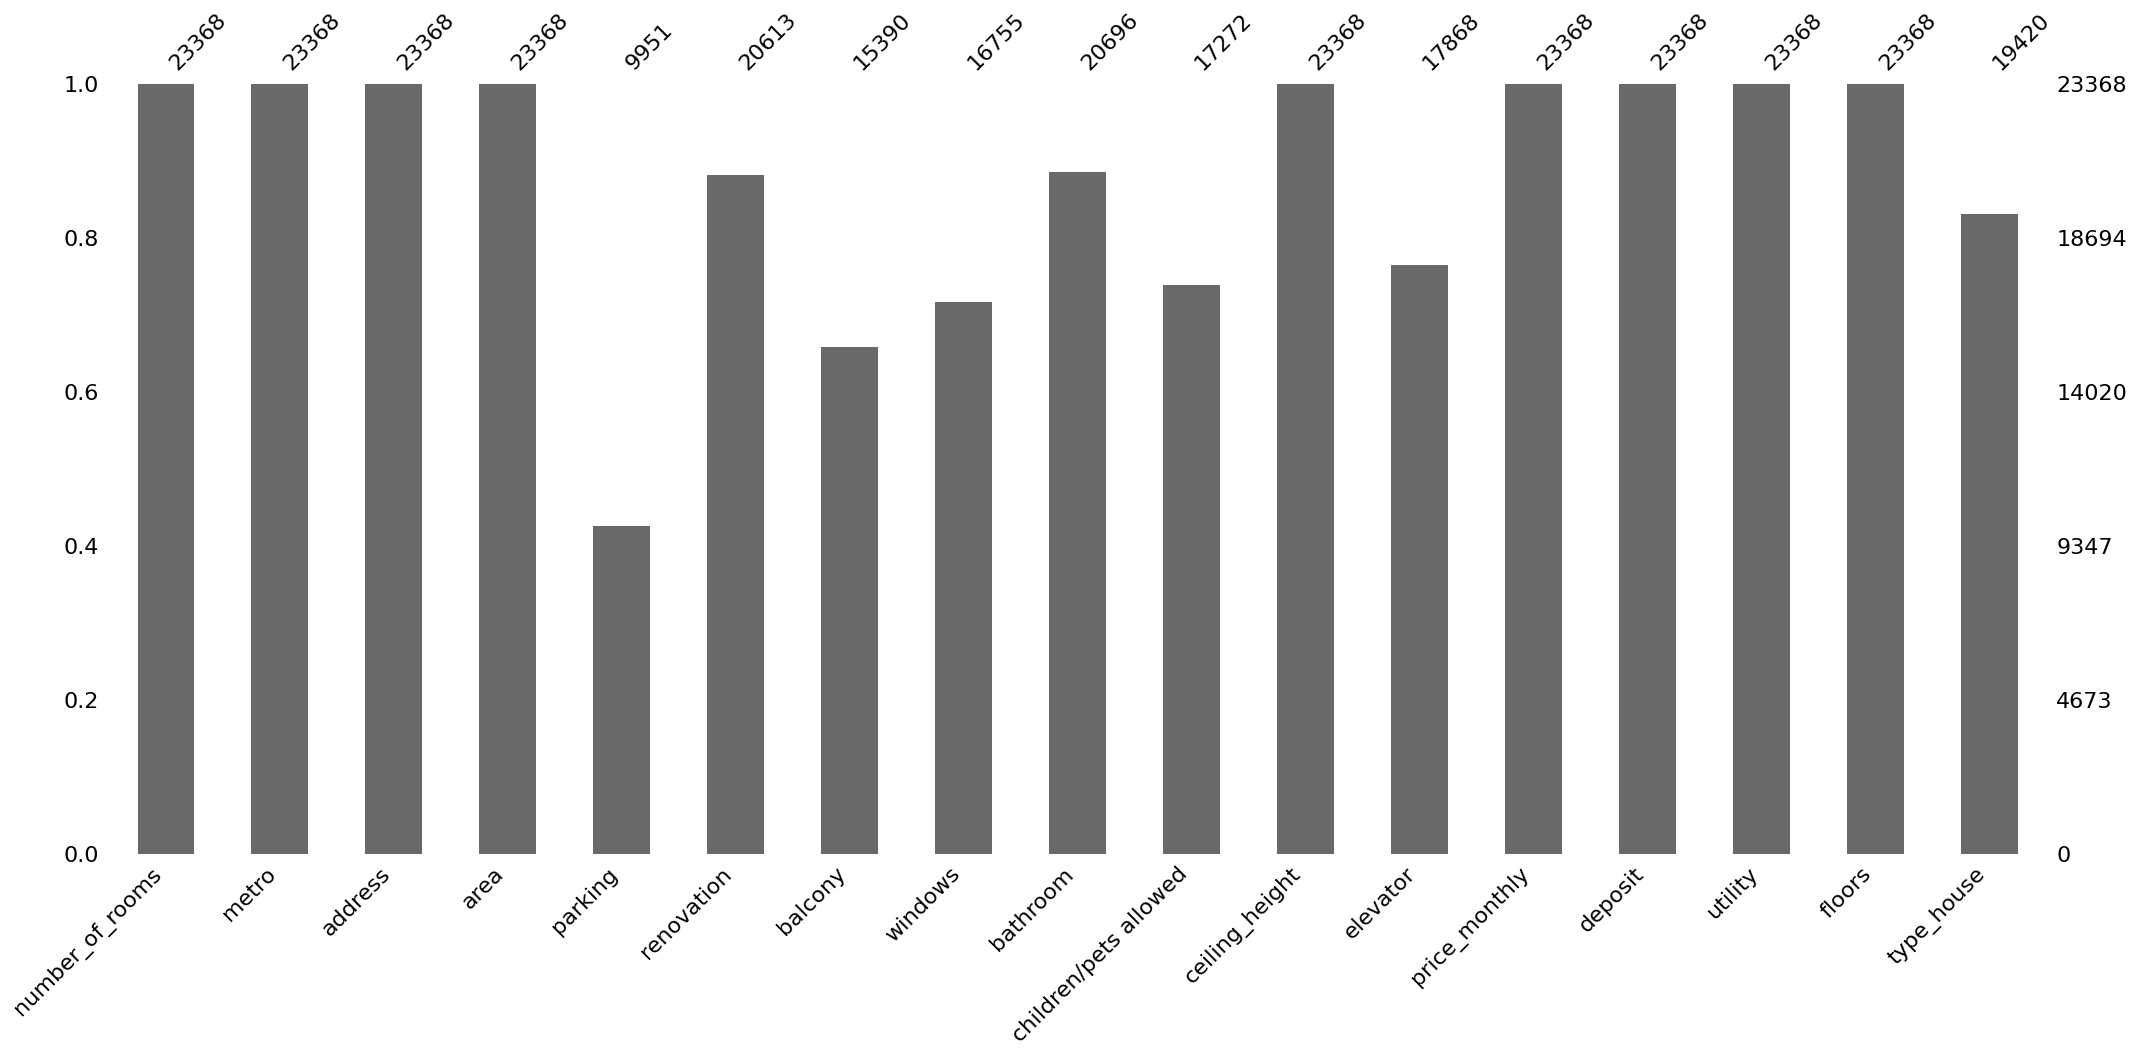

In [103]:
msno.bar(data_clean)

In [104]:
#неинформативными считаются признаки, в которых пропущено 20-30% информации, соответственно от парковки и балконов избавляемся

In [105]:
data_clean = data_clean.drop(columns=['balcony'])
data_clean

,number_of_rooms,metro,address,area,parking,renovation,windows,bathroom,children/pets allowed,ceiling_height,elevator,price_monthly,deposit,utility,floors,type_house
0,4,9.0,"Москва, улица Новый Арбат, 27",200.0,подземная,Дизайнерский,NaN,NaN,"Можно с детьми, Можно с животными",3.000000,"Пасс (4), Груз (1)",500000.0,500000.0,включены,516,Монолитный
1,4,8.0,"Москва, улица Новый Арбат, 27",198.0,подземная,Дизайнерский,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,3.500000,"Пасс (1), Груз (1)",500000.0,500000.0,включены,516,Монолитно-кирпичный
2,4,7.0,"Москва, улица Новый Арбат, 27",200.0,подземная,Евроремонт,На улицу и двор,Совмещенный (3),Можно с детьми,3.200000,Пасс (1),500000.0,500000.0,nan,516,None
3,4,3.0,"Москва, переулок Плотников, 21С1",170.0,подземная,Евроремонт,На улицу и двор,Совмещенный (3),Можно с животными,3.200000,Пасс (1),400000.0,400000.0,nan,56,None
4,2,7.0,"Москва, улица Новый Арбат, 15",58.0,NaN,Евроремонт,На улицу и двор,Совмещенный (2),NaN,3.900000,"Пасс (1), Груз (1)",225000.0,225000.0,включены,1226,Панельный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,0,8.0,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 км до МКАД), ш. Сколковское (8 км до МКАД)",35.0,NaN,Евроремонт,NaN,Совмещенный (1),NaN,3.718718,"Пасс (1), Груз (1)",42000.0,42000.0,включены,1014,None
23364,1,7.0,"Москва, Производственная улица, 8к1, ш. Боровское (5 км до МКАД), ш. Киевское (7 км до МКАД)",38.7,NaN,Евроремонт,Во двор,Совмещенный (1),NaN,2.973690,"Пасс (1), Груз (1)",45000.0,45000.0,включены,518,Монолитный
23365,2,6.0,"Москва, Боровский проезд, 11",43.1,NaN,Дизайнерский,На улицу и двор,Совмещенный (1),Можно с детьми,3.279265,NaN,50000.0,50000.0,включены,55,Кирпичный
23366,2,11.0,"Москва, улица Богданова, 6к1, ш. Боровское (3 км до МКАД), ш. Сколковское (8 км до МКАД)",52.5,наземная,Евроремонт,Во двор,"Совмещенный (1), Раздельный (1)",NaN,2.650000,Пасс (3),55000.0,50000.0,включены,823,Монолитный


In [106]:
missing_values = data_clean.isna().sum()
missing_values

number_of_rooms              0
metro                        0
address                      0
area                         0
parking                  13417
renovation                2755
windows                   6613
bathroom                  2672
children/pets allowed     6096
ceiling_height               0
elevator                  5500
price_monthly                0
deposit                      0
utility                      0
floors                       0
type_house                3948
dtype: int64

<Axes: >

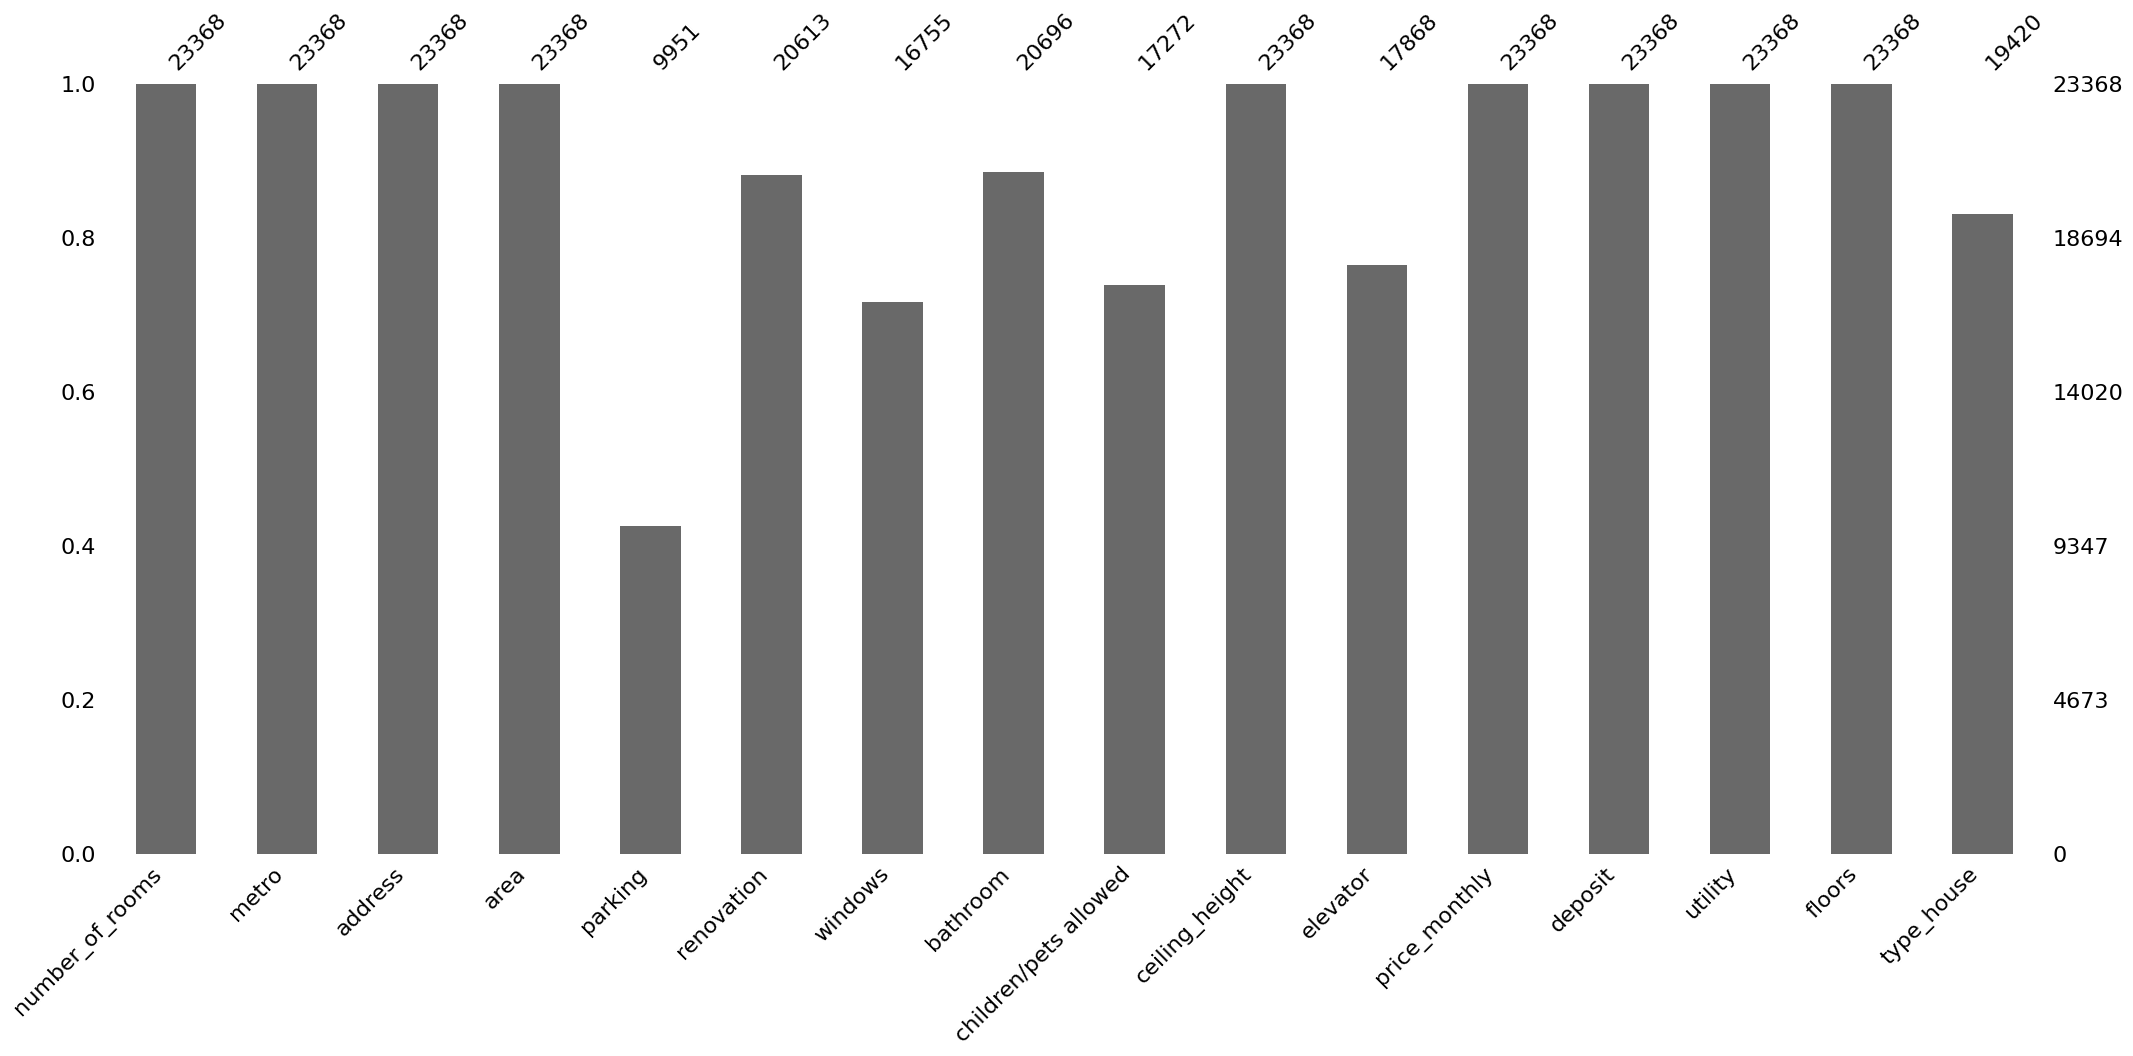

In [107]:
msno.bar(data_clean)